# Introduction to the Uber Dataset

In [ ]:
import pandas as pd  # import thư viện pandas để xử lý dữ liệu
#Read in the dataset of july uber pickups
uber_data = pd.read_csv("uber-raw-data-jul14.csv")  # đọc file csv dữ liệu uber
print(uber_data.tail(10))  # in 10 dòng cuối của dataframe
uber_data.info()  # hiển thị thông tin cấu trúc dữ liệu

                 Date/Time      Lat      Lon    Base
796111  7/31/2014 22:53:00  40.6262 -73.9448  B02764
796112  7/31/2014 22:54:00  40.7617 -73.9650  B02764
796113  7/31/2014 22:56:00  40.7049 -73.9337  B02764
796114  7/31/2014 23:05:00  40.7483 -74.0040  B02764
796115  7/31/2014 23:06:00  40.7332 -73.9934  B02764
796116  7/31/2014 23:22:00  40.7285 -73.9846  B02764
796117  7/31/2014 23:23:00  40.7615 -73.9868  B02764
796118  7/31/2014 23:29:00  40.6770 -73.9515  B02764
796119  7/31/2014 23:30:00  40.7225 -74.0038  B02764
796120  7/31/2014 23:58:00  40.7199 -73.9884  B02764
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796121 entries, 0 to 796120
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  796121 non-null  object 
 1   Lat        796121 non-null  float64
 2   Lon        796121 non-null  float64
 3   Base       796121 non-null  object 
dtypes: float64(2), object(2)
memory usage: 24.3+ MB


In [ ]:
#Convert the type of the column to datetime
uber_data["Date/Time"] = pd.to_datetime(uber_data["Date/Time"])  # chuyển cột Date/Time sang kiểu datetime

In [ ]:
#Using a floor can round off the date-time into discrete increments
print(uber_data["Date/Time"].dt.floor('1h').tail(10))  # làm tròn thời gian xuống theo từng giờ và in 10 dòng cuối

796111   2014-07-31 22:00:00
796112   2014-07-31 22:00:00
796113   2014-07-31 22:00:00
796114   2014-07-31 23:00:00
796115   2014-07-31 23:00:00
796116   2014-07-31 23:00:00
796117   2014-07-31 23:00:00
796118   2014-07-31 23:00:00
796119   2014-07-31 23:00:00
796120   2014-07-31 23:00:00
Name: Date/Time, dtype: datetime64[ns]


In [ ]:
#Let's get value counts to see the number of trips at given times
print(uber_data["Date/Time"].dt.floor('1h').value_counts().head(10))  # đếm số chuyến theo từng giờ và in 10 giá trị cao nhất

Date/Time
2014-07-15 18:00:00    3302
2014-07-15 19:00:00    3225
2014-07-15 17:00:00    3045
2014-07-02 18:00:00    2946
2014-07-15 20:00:00    2840
2014-07-23 20:00:00    2791
2014-07-23 21:00:00    2559
2014-07-31 18:00:00    2531
2014-07-23 17:00:00    2519
2014-07-02 17:00:00    2479
Name: count, dtype: int64


In [ ]:
#And sort the data so it is chronological
hourly_data = uber_data["Date/Time"].dt.floor('1h').value_counts()  # đếm số chuyến theo từng giờ
hourly_data = hourly_data.sort_index()  # sắp xếp theo thứ tự thời gian
print(hourly_data.head(10))  # in 10 giá trị đầu tiên

Date/Time
2014-07-01 00:00:00     216
2014-07-01 01:00:00     111
2014-07-01 02:00:00      82
2014-07-01 03:00:00     134
2014-07-01 04:00:00     223
2014-07-01 05:00:00     348
2014-07-01 06:00:00     715
2014-07-01 07:00:00    1196
2014-07-01 08:00:00    1076
2014-07-01 09:00:00     885
Name: count, dtype: int64


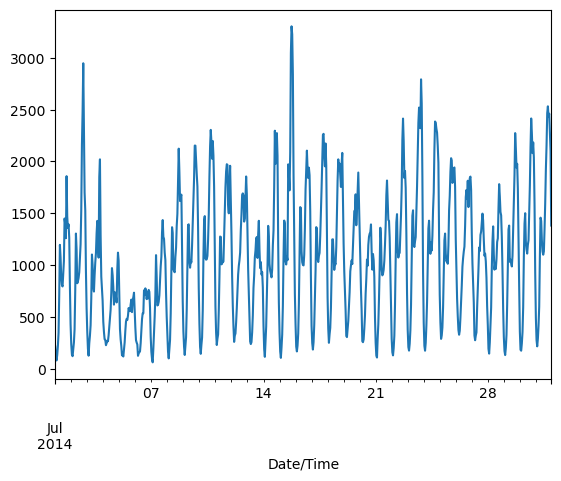

In [ ]:
import matplotlib.pyplot as plt  # import matplotlib để vẽ biểu đồ
#Plotting the data shows some trend components
hourly_data.plot(kind="line")  # vẽ biểu đồ đường cho dữ liệu theo giờ
plt.show()  # hiển thị biểu đồ

In [ ]:
#We are going to see the average number of trips for each hour/week day combination
#First split the date into the week day, hour and the actual date
hours = uber_data["Date/Time"].dt.hour  # trích xuất giờ từ cột Date/Time
week_day = uber_data["Date/Time"].dt.weekday  # trích xuất thứ trong tuần (0=thứ 2)
date = uber_data["Date/Time"].dt.date  # trích xuất ngày
weekly_data = pd.concat([week_day, hours, date], axis=1)  # ghép các cột lại thành dataframe
weekly_data.columns = ["Week Day", "Hour", "Date"]  # đặt tên cột
print(week_day.iloc[66003])  # in giá trị weekday tại vị trí 66003
print(weekly_data.tail(10))  # in 10 dòng cuối của dataframe

5
        Week Day  Hour        Date
796111         3    22  2014-07-31
796112         3    22  2014-07-31
796113         3    22  2014-07-31
796114         3    23  2014-07-31
796115         3    23  2014-07-31
796116         3    23  2014-07-31
796117         3    23  2014-07-31
796118         3    23  2014-07-31
796119         3    23  2014-07-31
796120         3    23  2014-07-31


In [ ]:
import calendar  # import thư viện calendar để làm việc với ngày tháng
#The calendar library can map the integer versions of calendar weekdays to the actual name
#0 -> Monday, 1 -> Tuesday, etc.
print(calendar.day_name[6])  # in tên ngày tương ứng với số 6 (Sunday)

Sunday


In [ ]:
#Map the name
weekly_data["Week Day"] = weekly_data["Week Day"].apply(lambda x: calendar.day_name[x])  # chuyển số weekday sang tên ngày
print(weekly_data["Week Day"].iloc[66003])  # in tên ngày tại vị trí 66003

Saturday


In [ ]:
#By grouping by the date, week day, and hour we can aggregate the size (# of entries) on each date
weekly_data = weekly_data.groupby(["Date", "Week Day", "Hour"]).size()  # nhóm theo ngày, thứ, giờ và đếm số bản ghi
print(weekly_data.head(10))  # in 10 giá trị đầu tiên

Date        Week Day  Hour
2014-07-01  Tuesday   0        216
                      1        111
                      2         82
                      3        134
                      4        223
                      5        348
                      6        715
                      7       1196
                      8       1076
                      9        885
dtype: int64


In [ ]:
#Reset the index
weekly_data = weekly_data.reset_index()  # đưa index về cột bình thường
print(weekly_data.head(10))  # in 10 dòng đầu tiên

         Date Week Day  Hour     0
0  2014-07-01  Tuesday     0   216
1  2014-07-01  Tuesday     1   111
2  2014-07-01  Tuesday     2    82
3  2014-07-01  Tuesday     3   134
4  2014-07-01  Tuesday     4   223
5  2014-07-01  Tuesday     5   348
6  2014-07-01  Tuesday     6   715
7  2014-07-01  Tuesday     7  1196
8  2014-07-01  Tuesday     8  1076
9  2014-07-01  Tuesday     9   885


In [ ]:
#Rename 0, the default column name to be size
weekly_data = weekly_data.rename(columns={0: "Size"})  # đổi tên cột 0 thành Size
print(weekly_data.head(10))  # in 10 dòng đầu tiên

         Date Week Day  Hour  Size
0  2014-07-01  Tuesday     0   216
1  2014-07-01  Tuesday     1   111
2  2014-07-01  Tuesday     2    82
3  2014-07-01  Tuesday     3   134
4  2014-07-01  Tuesday     4   223
5  2014-07-01  Tuesday     5   348
6  2014-07-01  Tuesday     6   715
7  2014-07-01  Tuesday     7  1196
8  2014-07-01  Tuesday     8  1076
9  2014-07-01  Tuesday     9   885


In [ ]:
#Now we can group by the week day and average to get the mean for each week day/hour
weekly_data = weekly_data.groupby(["Week Day", "Hour"])["Size"].mean()  # nhóm theo thứ và giờ rồi lấy trung bình
print(weekly_data.head(10))  # in 10 giá trị đầu tiên

Week Day  Hour
Friday    0        615.00
          1        385.25
          2        264.75
          3        307.50
          4        339.75
          5        497.25
          6        736.75
          7       1008.00
          8       1038.00
          9        907.75
Name: Size, dtype: float64


In [ ]:
#Unstack takes a level of the index and translates it to be a column
#We pick level=0 because we want the week day name to be the column
weekly_data = weekly_data.unstack(level=0)  # chuyển level Week Day từ index thành cột
print(weekly_data)  # in dataframe kết quả

Week Day   Friday   Monday  Saturday   Sunday  Thursday  Tuesday  Wednesday
Hour                                                                       
0          615.00   315.00   1110.25  1090.00     430.0    301.8      354.6
1          385.25   153.25    788.25   829.50     231.4    155.8      193.2
2          264.75   109.75    580.00   638.25     171.0    111.2      156.0
3          307.50   254.75    426.00   477.00     256.6    187.0      224.0
4          339.75   403.75    271.75   245.50     376.8    296.6      326.0
5          497.25   615.25    274.25   231.25     586.2    546.0      559.8
6          736.75   911.00    303.50   256.75     959.2    962.2     1003.4
7         1008.00  1266.50    398.50   316.25    1341.8   1350.0     1425.8
8         1038.00  1199.25    525.25   466.75    1336.6   1332.4     1425.0
9          907.75   923.00    667.00   657.50    1077.0   1012.2     1083.8
10         875.75   855.75    823.25   801.25    1014.2    977.4     1035.2
11         9

In [ ]:
#Reindex allows you to re-arrange the columns however you would like
weekly_data = weekly_data.reindex(columns=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])  # sắp xếp lại thứ tự cột theo ngày trong tuần
print(weekly_data)  # in dataframe kết quả

Week Day   Monday  Tuesday  Wednesday  Thursday   Friday  Saturday   Sunday
Hour                                                                       
0          315.00    301.8      354.6     430.0   615.00   1110.25  1090.00
1          153.25    155.8      193.2     231.4   385.25    788.25   829.50
2          109.75    111.2      156.0     171.0   264.75    580.00   638.25
3          254.75    187.0      224.0     256.6   307.50    426.00   477.00
4          403.75    296.6      326.0     376.8   339.75    271.75   245.50
5          615.25    546.0      559.8     586.2   497.25    274.25   231.25
6          911.00    962.2     1003.4     959.2   736.75    303.50   256.75
7         1266.50   1350.0     1425.8    1341.8  1008.00    398.50   316.25
8         1199.25   1332.4     1425.0    1336.6  1038.00    525.25   466.75
9          923.00   1012.2     1083.8    1077.0   907.75    667.00   657.50
10         855.75    977.4     1035.2    1014.2   875.75    823.25   801.25
11         8

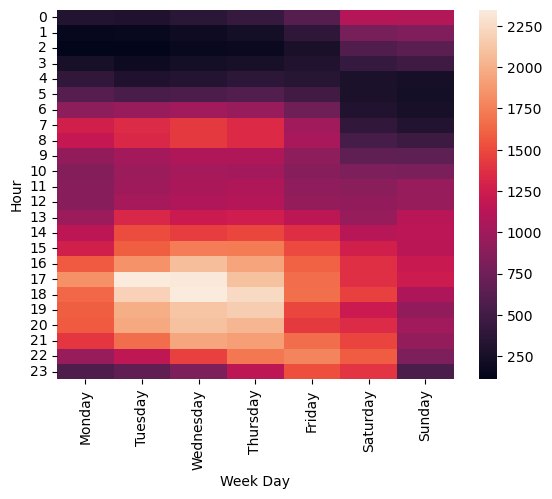

In [ ]:
import seaborn as sns  # import thư viện seaborn để vẽ biểu đồ nâng cao
#Plot a heatmap of the data
sns.heatmap(weekly_data)  # vẽ heatmap cho dữ liệu theo giờ và ngày trong tuần
plt.show()  # hiển thị biểu đồ

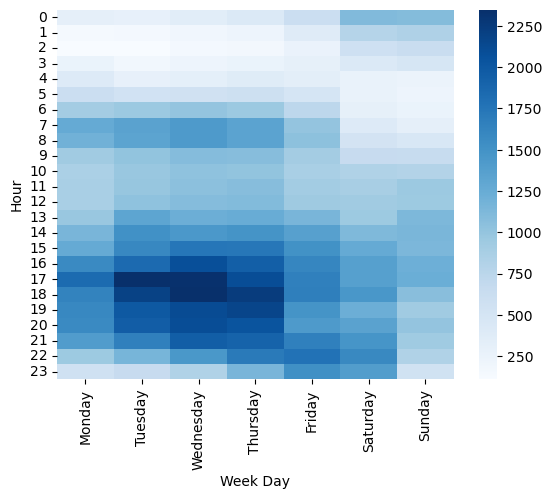

In [ ]:
#Change the color map to blue
sns.heatmap(weekly_data, cmap='Blues')  # vẽ heatmap với bảng màu xanh
plt.show()  # hiển thị biểu đồ

# Points of Interest

In [ ]:
#geopy is a library which finds distance between latitude and longitude! python3 -m 
%pip install geopy  # cài đặt thư viện geopy
import geopy.distance  # import module tính khoảng cách địa lý

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Check to make sure latitude and longitude are in the right order
metro_art_coordinates = (40.7794, -73.9632)  # tọa độ bảo tàng met
empire_state_building_coordinates = (40.7484, -73.9857)  # tọa độ tòa nhà empire state
distance = geopy.distance.distance(metro_art_coordinates, empire_state_building_coordinates)  # tính khoảng cách giữa hai điểm
print(distance)  # in khoảng cách theo km
print(distance.mi)  # in khoảng cách theo dặm

3.9319431838516716 km
2.443196223959372


In [ ]:
#Easy way to convert our latitude and longitude columns to tuples
print(uber_data[["Lat", "Lon"]].apply(lambda x: tuple(x), axis=1))  # chuyển từng dòng lat, lon thành tuple và in ra

0         (40.7586, -73.9706)
1         (40.7605, -73.9994)
2          (40.732, -73.9999)
3         (40.7635, -73.9793)
4         (40.7204, -74.0047)
                 ...         
796116    (40.7285, -73.9846)
796117    (40.7615, -73.9868)
796118     (40.677, -73.9515)
796119    (40.7225, -74.0038)
796120    (40.7199, -73.9884)
Length: 796121, dtype: object


In [ ]:
#Using the geopy version may take too long, so we will use the haversine formula instead
from math import radians, cos, sin, asin, sqrt  # import các hàm toán học cần thiết

def haversine(coordinates1, coordinates2):  # hàm tính khoảng cách giữa 2 tọa độ

    lon1 = coordinates1[1]  # lấy kinh độ điểm 1
    lat1 = coordinates1[0]  # lấy vĩ độ điểm 1
    lon2 = coordinates2[1]  # lấy kinh độ điểm 2
    lat2 = coordinates2[0]  # lấy vĩ độ điểm 2
    #Change to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])  # đổi sang radian
    
    
    # Apply the harversine formula
    dlon = lon2 - lon1  # hiệu kinh độ
    dlat = lat2 - lat1  # hiệu vĩ độ
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2  # công thức haversine
    c = 2 * asin(sqrt(a))  # tính góc trung tâm
    r = 3956  # bán kính trái đất (dặm)
    return c * r  # trả về khoảng cách

print(haversine(metro_art_coordinates, empire_state_building_coordinates))  # in khoảng cách bằng haversine
print(distance.mi)  # in khoảng cách từ geopy để so sánh

2.442501323483997
2.443196223959372


In [ ]:
#Now, we can find the distances to both attractions
uber_data["Distance MM"] = uber_data[["Lat", "Lon"]].apply(lambda x: haversine(metro_art_coordinates, tuple(x)), axis=1)  # tính khoảng cách đến bảo tàng met
uber_data["Distance ESB"] = uber_data[["Lat", "Lon"]].apply(lambda x: haversine(empire_state_building_coordinates, tuple(x)), axis=1)  # tính khoảng cách đến empire state building
print(uber_data["Distance MM"].head(5))  # in 5 giá trị đầu tiên khoảng cách đến met
print(uber_data["Distance ESB"].head(5))  # in 5 giá trị đầu tiên khoảng cách đến esb

0    1.487358
1    2.299140
2    3.794105
3    1.383450
4    4.615925
Name: Distance MM, dtype: float64
0    1.058178
1    1.100642
2    1.354266
3    1.094999
4    2.173858
Name: Distance ESB, dtype: float64


In [ ]:
#Summarize the data
print(uber_data[["Distance MM", "Distance ESB"]].describe())  # thống kê mô tả khoảng cách đến met và esb

         Distance MM   Distance ESB
count  796121.000000  796121.000000
mean        3.868244       2.723783
std         3.200848       3.276343
min         0.037592       0.000000
25%         1.863763       0.976621
50%         3.329218       1.726115
75%         4.691434       3.037256
max        86.770131      88.188585


In [ ]:
#Using boolean indexing, we can sum to find the count within a specified range
print((uber_data[["Distance MM", "Distance ESB"]] < .25).sum())  # đếm số điểm có khoảng cách nhỏ hơn 0.25 dặm

Distance MM      2764
Distance ESB    15133
dtype: int64


In [ ]:
import numpy as np  # import thư viện numpy để xử lý số học
#Distance range takes a start, end (non-inclusive) and step amount
distance_range = np.arange(.1, 5.1, .1)  # tạo mảng khoảng cách từ 0.1 đến 5.0 với bước 0.1
print(distance_range)  # in mảng khoảng cách

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]


In [ ]:
#Run our analysis for each distance
distance_data = [(uber_data[["Distance MM", "Distance ESB"]] < dist).sum() for dist in distance_range]  # đếm số điểm nhỏ hơn từng khoảng cách
print(distance_data)  # in kết quả danh sách

[Distance MM      575
Distance ESB    2387
dtype: int64, Distance MM     1776
Distance ESB    9661
dtype: int64, Distance MM      4566
Distance ESB    22166
dtype: int64, Distance MM      8783
Distance ESB    42427
dtype: int64, Distance MM     13606
Distance ESB    68011
dtype: int64, Distance MM     20770
Distance ESB    92650
dtype: int64, Distance MM      29408
Distance ESB    119621
dtype: int64, Distance MM      38912
Distance ESB    147815
dtype: int64, Distance MM      50497
Distance ESB    177759
dtype: int64, Distance MM      63072
Distance ESB    206056
dtype: int64, Distance MM      75474
Distance ESB    240003
dtype: int64, Distance MM      89442
Distance ESB    277785
dtype: int64, Distance MM     105692
Distance ESB    311312
dtype: int64, Distance MM     123431
Distance ESB    335385
dtype: int64, Distance MM     141656
Distance ESB    355731
dtype: int64, Distance MM     157194
Distance ESB    375017
dtype: int64, Distance MM     174148
Distance ESB    393510
dtype: in

In [ ]:
#Concat
distance_data = pd.concat(distance_data, axis=1)  # ghép các series thành dataframe theo cột
print(distance_data)  # in dataframe kết quả

                0     1      2      3      4      5       6       7       8   \
Distance MM    575  1776   4566   8783  13606  20770   29408   38912   50497   
Distance ESB  2387  9661  22166  42427  68011  92650  119621  147815  177759   

                  9   ...      40      41      42      43      44      45  \
Distance MM    63072  ...  512662  529702  546998  563198  575552  588588   
Distance ESB  206056  ...  656735  661066  665748  670373  674744  678522   

                  46      47      48      49  
Distance MM   597941  614256  621624  626604  
Distance ESB  682262  685487  688588  691884  

[2 rows x 50 columns]


In [ ]:
#Transpose and add in the index
distance_data = distance_data.transpose()  # chuyển hàng thành cột
distance_data.index = distance_range  # gán index là các khoảng cách
print(distance_data)  # in dataframe kết quả

     Distance MM  Distance ESB
0.1          575          2387
0.2         1776          9661
0.3         4566         22166
0.4         8783         42427
0.5        13606         68011
0.6        20770         92650
0.7        29408        119621
0.8        38912        147815
0.9        50497        177759
1.0        63072        206056
1.1        75474        240003
1.2        89442        277785
1.3       105692        311312
1.4       123431        335385
1.5       141656        355731
1.6       157194        375017
1.7       174148        393510
1.8       190108        412560
1.9       204501        434040
2.0       219190        453986
2.1       234681        472681
2.2       250469        489396
2.3       265164        502460
2.4       276425        518076
2.5       291165        532569
2.6       306739        544541
2.7       318762        557718
2.8       329219        571684
2.9       341297        583354
3.0       354514        592929
3.1       369129        603990
3.2     

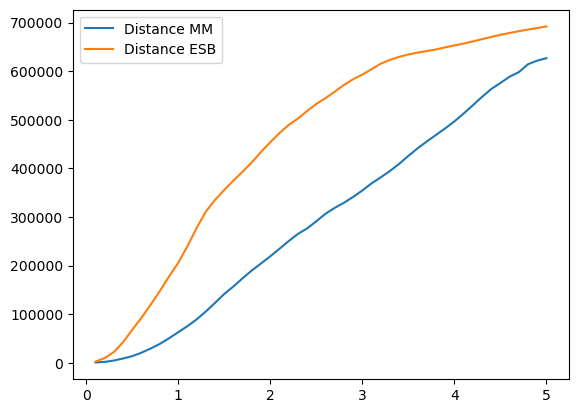

In [ ]:
#And plot
distance_data.plot(kind="line")  # vẽ biểu đồ đường cho dữ liệu khoảng cách
plt.show()  # hiển thị biểu đồ

# Mapping Data with Folium

In [ ]:
#%pip install folium  # cài đặt thư viện folium nếu chưa có
#Folium can let us map geographical data, first get a base map with latitude and longitude
import folium as folium  # import thư viện folium để vẽ bản đồ
uber_map = folium.Map(location=[10.827733894596696, 106.70005608296239], zoom_start=18)  # tạo bản đồ tại vị trí cho trước
uber_map  # hiển thị bản đồ

In [ ]:
#Pick the first five latitude/longitude combinations
lat = uber_data["Lat"].values[:5]  # lấy 5 giá trị vĩ độ đầu tiên
lon = uber_data["Lon"].values[:5]  # lấy 5 giá trị kinh độ đầu tiên

#uber_map = folium.Map(location=[10.411017, 105.430817], zoom_start=12) #Long xuyên
uber_map = folium.Map(location=[10.827611871446596, 106.70004478887559], zoom_start=18)  # tạo bản đồ tại vị trí cho trước
#Marker let's you drop markers on the map
#You can also add text to the markers with the popup argument
for i in range(len(lat)):  # duyệt qua từng cặp tọa độ
    folium.Marker((lat[i], lon[i]), popup="Rider {}".format(i+1)).add_to(uber_map)  # thêm marker lên bản đồ
uber_map  # hiển thị bản đồ

In [ ]:
from folium.plugins import HeatMap  # import công cụ heatmap từ folium

lat_lon = uber_data[["Lat", "Lon"]].values[:10000]  # lấy 10000 cặp tọa độ đầu tiên
uber_map = folium.Map(location=[10.827611871446596, 106.70004478887559], zoom_start=18)  # tạo bản đồ nền tại vị trí trung tâm
#A heatmap can be plotted like so... the radius argument controls the radius of each point within the map  # vẽ heatmap, radius điều chỉnh độ lan của mỗi điểm
#You can zoom in on this map to see more specific areas, or out to see more general  # có thể zoom để xem chi tiết hoặc tổng quát
HeatMap(lat_lon, radius=13).add_to(uber_map)  # thêm heatmap vào bản đồ
uber_map  # hiển thị bản đồ

In [ ]:
lat_lon = uber_data[["Lat", "Lon"]].values[:10000]  # lấy 10000 cặp tọa độ đầu tiên
uber_map = folium.Map(location=[10.827611871446596, 106.70004478887559], zoom_start=18)  # tạo bản đồ nền tại vị trí trung tâm
#A bigger radius (and more zoom) can let us observe drop offs outside of the city that happen often  # bán kính lớn hơn giúp quan sát các điểm xa trung tâm
#Such as the airport  # ví dụ như sân bay
HeatMap(lat_lon, radius=30).add_to(uber_map)  # thêm heatmap với bán kính lớn hơn vào bản đồ
uber_map  # hiển thị bản đồ

In [ ]:
#We can also give a weight to either give different values to points, or to make the graphs less dense looking  # có thể gán trọng số để thay đổi mức độ ảnh hưởng của từng điểm hoặc làm đồ thị bớt dày
uber_data["Weight"] = .5  # thêm cột weight với giá trị 0.5 cho tất cả điểm
lat_lon = uber_data[["Lat", "Lon", "Weight"]].values[:10000]  # lấy 10000 dòng đầu gồm lat, lon và weight
uber_map = folium.Map(location=[10.827611871446596, 106.70004478887559], zoom_start=18)  # tạo bản đồ nền tại vị trí trung tâm
#Now let's increase radius since the weights are less  # tăng bán kính vì trọng số nhỏ hơn
HeatMap(lat_lon, radius=15).add_to(uber_map)  # thêm heatmap vào bản đồ
uber_map  # hiển thị bản đồ

In [ ]:
#Let's get the points that are within distance of either point of interest  # lấy các điểm nằm trong khoảng cách tới một trong hai địa điểm quan tâm
#There won't be overlap if we use only points that are .25 mile away  # sẽ không bị chồng lấn nếu chỉ dùng các điểm cách dưới 0.25 dặm
i = uber_data[["Distance MM", "Distance ESB"]] < .25  # tạo mask boolean cho các điểm có khoảng cách < 0.25
print(i)  # in ra mask kết quả

        Distance MM  Distance ESB
0             False         False
1             False         False
2             False         False
3             False         False
4             False         False
...             ...           ...
796116        False         False
796117        False         False
796118        False         False
796119        False         False
796120        False         False

[796121 rows x 2 columns]


In [ ]:
#Take data where either one is true  # lấy các dòng mà ít nhất một điều kiện đúng
i = i.any(axis=1)  # gộp theo hàng, true nếu distance mm hoặc distance esb < 0.25
print(i)  # in ra kết quả boolean theo từng dòng

0         False
1         False
2         False
3         False
4         False
          ...  
796116    False
796117    False
796118    False
796119    False
796120    False
Length: 796121, dtype: bool


In [ ]:
#This is our map data  
map_data = uber_data[i].copy()  # lấy các dòng thỏa điều kiện i và tạo bản sao
print(map_data)  # in ra dữ liệu map_data

                 Date/Time      Lat      Lon    Base  Distance MM  \
5      2014-07-01 00:35:00  40.7487 -73.9869  B02512     2.455439   
13     2014-07-01 02:07:00  40.7471 -73.9872  B02512     2.559080   
17     2014-07-01 03:20:00  40.7498 -73.9813  B02512     2.252287   
31     2014-07-01 05:22:00  40.7489 -73.9874  B02512     2.456893   
104    2014-07-01 07:39:00  40.7782 -73.9590  B02512     0.234702   
...                    ...      ...      ...     ...          ...   
795863 2014-07-31 13:02:00  40.7463 -73.9888  B02764     2.648655   
795910 2014-07-31 15:35:00  40.7460 -73.9864  B02764     2.605797   
795925 2014-07-31 16:05:00  40.7449 -73.9866  B02764     2.678014   
795940 2014-07-31 16:32:00  40.7501 -73.9825  B02764     2.260816   
796101 2014-07-31 22:29:00  40.7495 -73.9820  B02764     2.286599   

        Distance ESB  Weight  
5           0.066098     0.5  
13          0.119218     0.5  
17          0.249626     0.5  
31          0.095389     0.5  
104         2.48

In [ ]:
#Let's draw on a heatmap with the locations within the radius
#Notice that one heatmap is a semi-circle because drop offs can't happen to the left of it
map_data["Weight"] = .1  # gán trọng số cho mỗi điểm
lat_lon = map_data[["Lat", "Lon", "Weight"]].values  # lấy lat, lon và weight thành mảng numpy
uber_map = folium.Map(location=[10.827611871446596, 106.70004478887559], zoom_start=18)  # tạo bản đồ folium với vị trí trung tâm và mức zoom
HeatMap(lat_lon, radius=10).add_to(uber_map)  # thêm heatmap vào bản đồ với bán kính 10
uber_map  # hiển thị bản đồ

In [ ]:
#Let's grab only the date and hour by replacing the other parts with 0
uber_data["Date_Hour"] = uber_data["Date/Time"].apply(lambda x: x.replace(microsecond=0,second=0,minute=0))  # làm tròn thời gian về đầu giờ bằng cách đặt microsecond, second, minute = 0
print(uber_data["Date_Hour"])  # in cột Date_Hour ra màn hìn

0        2014-07-01 00:00:00
1        2014-07-01 00:00:00
2        2014-07-01 00:00:00
3        2014-07-01 00:00:00
4        2014-07-01 00:00:00
                 ...        
796116   2014-07-31 23:00:00
796117   2014-07-31 23:00:00
796118   2014-07-31 23:00:00
796119   2014-07-31 23:00:00
796120   2014-07-31 23:00:00
Name: Date_Hour, Length: 796121, dtype: datetime64[ns]


In [ ]:
from datetime import datetime  # import lớp datetime để làm việc với thời gian
#Take only the first week of data
map_data = uber_data[uber_data["Date/Time"] < datetime(2014,7,8)].copy()  # lấy dữ liệu trong tuần đầu tiên và tạo bản sao
map_data["Weight"] = .5  # thêm cột trọng số với giá trị 0.5
#Randomly sample 1/3 the values in each group
map_data = map_data.groupby('Date_Hour').apply(lambda x: x[["Lat", "Lon", "Weight"]].sample(int(len(x)/3)).values.tolist())  # nhóm theo Date_Hour và lấy ngẫu nhiên 1/3 số dòng mỗi nhóm
#Get the index
date_hour_index = [x.strftime("%m/%d/%Y, %H:%M:%S") for x in map_data.index]  # chuyển index datetime sang chuỗi định dạng tháng/ngày/năm, giờ:phút:giây
#Get the data in list form (each element of this bigger list will be a list of lists with lat/lon/weight)
#Each element of the bigger list is a for a date/hour combo
date_hour_data = map_data.tolist()  # chuyển dữ liệu sang dạng list

C:\Users\Admin\AppData\Local\Temp\ipykernel_21228\2835678608.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  map_data = map_data.groupby('Date_Hour').apply(lambda x: x[["Lat", "Lon", "Weight"]].sample(int(len(x)/3)).values.tolist())


In [ ]:
from folium.plugins import HeatMapWithTime  # import lớp HeatMapWithTime để vẽ heatmap theo thời gian
uber_map = folium.Map(location=[10.827611871446596, 106.70004478887559], zoom_start=12)  # tạo bản đồ với vị trí trung tâm và mức zoom ban đầu
#A heatmap with time can now be out together
hm = HeatMapWithTime(date_hour_data, index=date_hour_index)  # tạo heatmap theo thời gian từ dữ liệu và nhãn thời gian
hm.add_to(uber_map)  # thêm heatmap vào bản đồ
uber_map  # hiển thị bản đồ

# Testing Seasonality

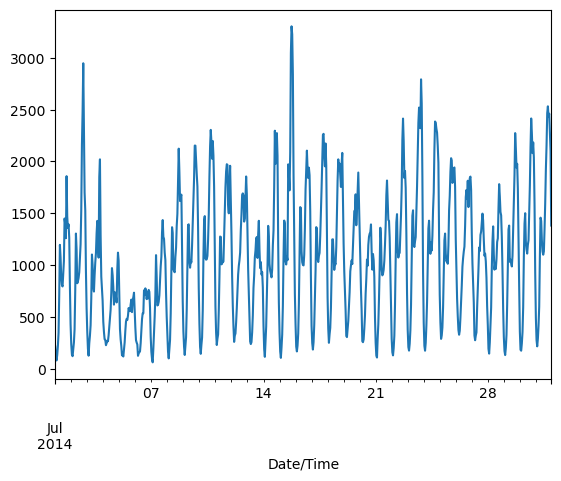

In [ ]:
#Recall the seasonality we saw before
hourly_data.plot(kind='line')  # vẽ biểu đồ đường thể hiện số chuyến theo từng giờ
plt.show()  # hiển thị biểu đồ

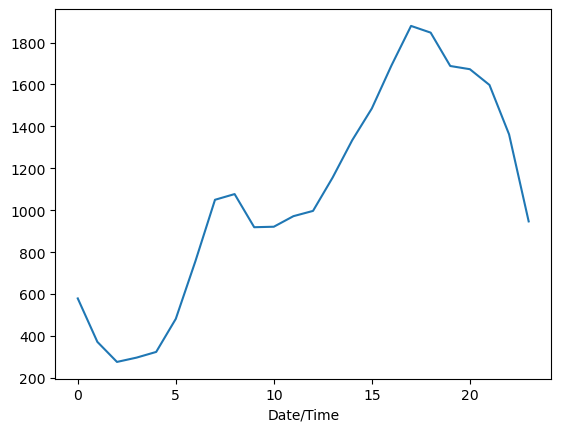

In [ ]:
#What about the hourly trends?
h = hourly_data.groupby(hourly_data.index.hour).mean()  # nhóm theo giờ trong ngày và tính trung bình
h.plot(kind="line")  # vẽ biểu đồ đường xu hướng theo giờ
plt.show()  # hiển thị biểu đồ

In [ ]:
#Something else of interest is the difference in hourly trends for weekdays and weekends
#We will index with i for weekdays
i = hourly_data.index.weekday <= 4  # tạo mặt nạ boolean cho các ngày trong tuần (thứ 2–thứ 6)

h_week = hourly_data.loc[i].groupby(hourly_data.loc[i].index.hour).mean()  # tính trung bình theo giờ cho ngày trong tuần
h_weekend = hourly_data.loc[~i].groupby(hourly_data.loc[~i].index.hour).mean()  # tính trung bình theo giờ cho cuối tuần
h = pd.concat([h_week, h_weekend], axis=1)  # ghép dữ liệu ngày thường và cuối tuần thành một bảng
h.columns = ["Weekday", "Weekend"]  # đặt tên cột
print(h)  # in kết quả

               Weekday   Weekend
Date/Time                       
0           397.913043  1100.125
1           219.826087   808.875
2           160.391304   609.125
3           242.913043   451.500
4           346.565217   258.625
5           561.304348   252.750
6           922.391304   280.125
7          1290.695652   357.375
8          1279.086957   496.000
9          1008.173913   662.250
10          959.130435   812.250
11          988.695652   922.500
12         1017.086957   938.375
13         1195.869565  1040.875
14         1403.652174  1134.125
15         1583.130435  1205.125
16         1828.434783  1293.625
17         2080.478261  1301.125
18         2050.739130  1262.625
19         1900.826087  1076.625
20         1845.695652  1176.000
21         1734.217391  1205.125
22         1416.956522  1203.500
23          936.869565   974.750


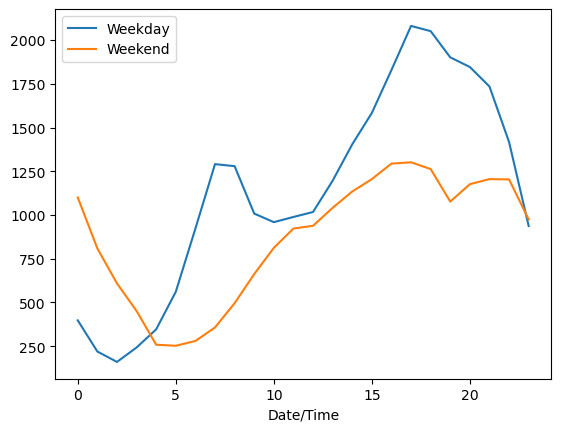

In [ ]:
#And plot to see the difference
h.plot(kind='line')  # vẽ biểu đồ đường để so sánh xu hướng theo giờ giữa ngày thường và cuối tuần
plt.show()  # hiển thị biểu đồ

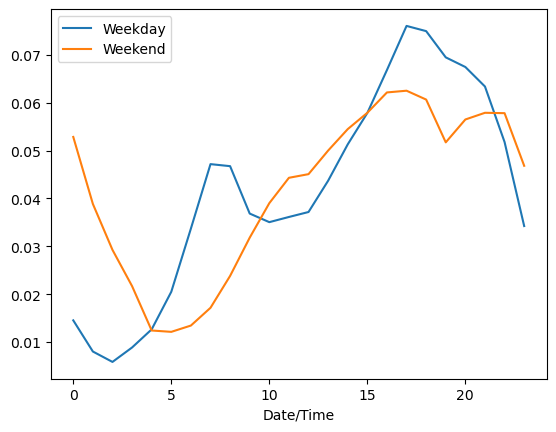

In [ ]:
#We can also divide by the total number of trips for each to normalize and have each be a percent of total trips in a day
(h / h.sum()).plot(kind='line')  # chia cho tổng số chuyến để chuẩn hóa thành tỷ lệ phần trăm theo ngày
plt.show()  # hiển thị biểu đồ

In [ ]:
#We can finish our assessment of whether or not we see hourly effects by using a t-test to see if each hour
#has a statistically different proportion of rides for weekends vs. weekdays
from scipy.stats import ttest_ind  # import hàm kiểm định t độc lập

#The functions takes two samples and returns the t-stat and the p-value denoting the null hypothesis that they are the same
print(ttest_ind([100,105,110], [200,230,210]))  # thực hiện kiểm định t giữa hai mẫu và in ra kết quả

TtestResult(statistic=np.float64(-11.67434463174037), pvalue=np.float64(0.0003078015152715608), df=np.float64(4.0))


In [ ]:
#Now for each day, let's normalize by the total number of rides in the day
hourly_data_pct = hourly_data.groupby(hourly_data.index.date).apply(lambda x: x / x.sum())  # chuẩn hóa số chuyến mỗi giờ theo tổng số chuyến trong ngày
print(hourly_data_pct)  # in ra dữ liệu đã chuẩn hóa

            Date/Time          
2014-07-01  2014-07-01 00:00:00    0.010175
            2014-07-01 01:00:00    0.005229
            2014-07-01 02:00:00    0.003863
            2014-07-01 03:00:00    0.006312
            2014-07-01 04:00:00    0.010505
                                     ...   
2014-07-31  2014-07-31 19:00:00    0.072449
            2014-07-31 20:00:00    0.073343
            2014-07-31 21:00:00    0.067827
            2014-07-31 22:00:00    0.062580
            2014-07-31 23:00:00    0.041203
Name: count, Length: 744, dtype: float64
